In [3]:
import torch
import torch.nn as nn
import argparse
import wandb
from datasets import load_dataset
from data import augment, generate_masks
from tqdm import tqdm
from models import *
import os

from models import *
from data import *
from train import *

import matplotlib.pyplot as plt
import numpy as np

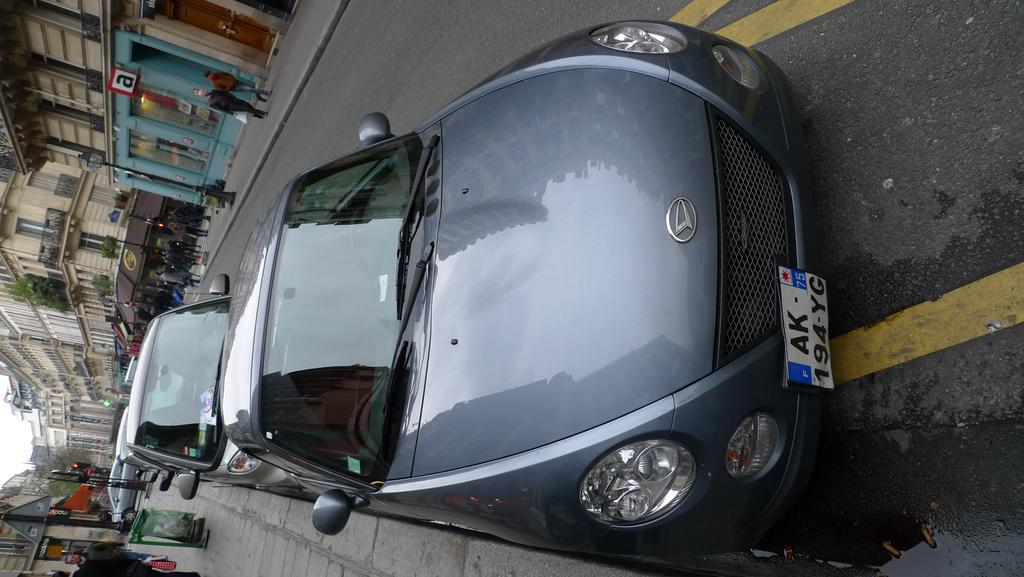

In [85]:
im_idx = 3
checkpoint = 40
ds['test'][im_idx]['image']

In [88]:
batch = augment(ds['test'][im_idx:im_idx+1])
masks = generate_masks(batch)

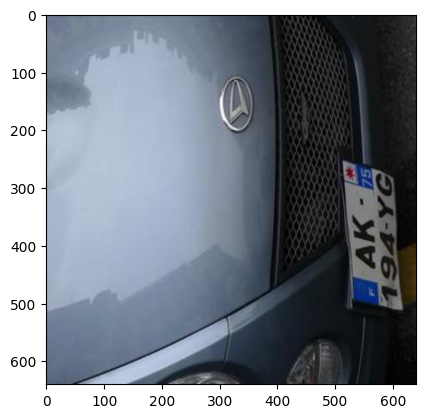

In [89]:
plt.imshow(np.asarray(batch[0][0].permute(1,2,0)))
plt.savefig(f'img/unblurred-baseline-{checkpoint}-{im_idx}.png', dpi=300)

In [90]:
device = torch.device('cpu')
model = nn.DataParallel(BaselineModel()).to(device)
model.load_state_dict(torch.load(f'out/model-baseline-{checkpoint}.pt', map_location=device))
model = model.module

In [91]:
images = torch.stack([img for img, _ in batch]).to(device)
masks = torch.stack(masks).to(device)

In [94]:
preds = model(images).squeeze(0)
pred_mask = preds[0, :, :] > 0.2 # weakly confident that it's part of the background

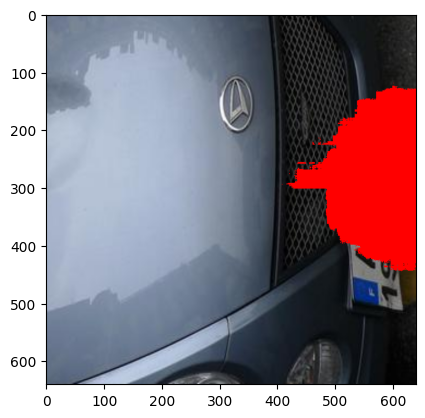

In [95]:
img = images.squeeze(0)
masked_img = img * pred_mask
red = torch.zeros_like(img)
red[0, :, :] = 1
red *= ~pred_mask
masked_img += red
plt.imshow(np.asarray(masked_img.permute(1,2,0)))
plt.savefig(f'img/blurred-baseline-{checkpoint}-{im_idx}.png', dpi=300)